1. CITIREA SI PREPROCESAREA COLOANELOR : 

In [3]:
import pandas as pd

data = pd.read_csv('insurance.csv')  

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data['sex'] = data['sex'].astype('category').cat.codes
data['smoker'] = data['smoker'].astype('category').cat.codes
data['region'] = data['region'].astype('category').cat.codes

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


2. PLOTARE FIECARE FEATURE VS CHARGES

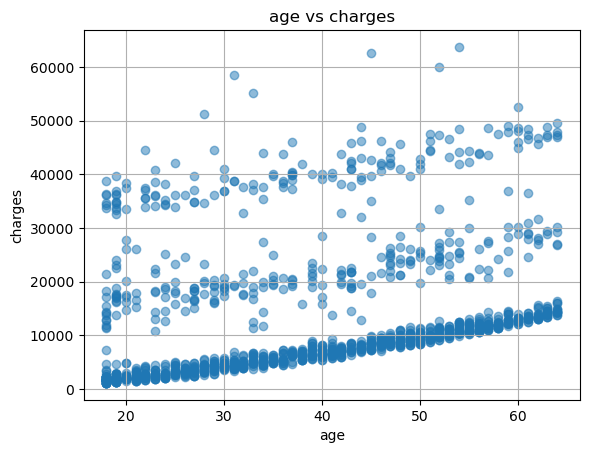

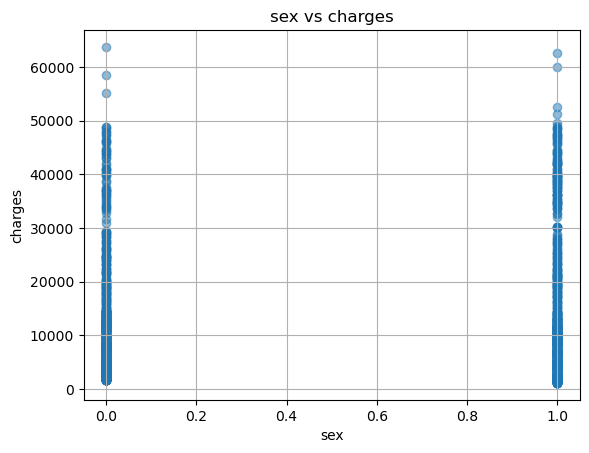

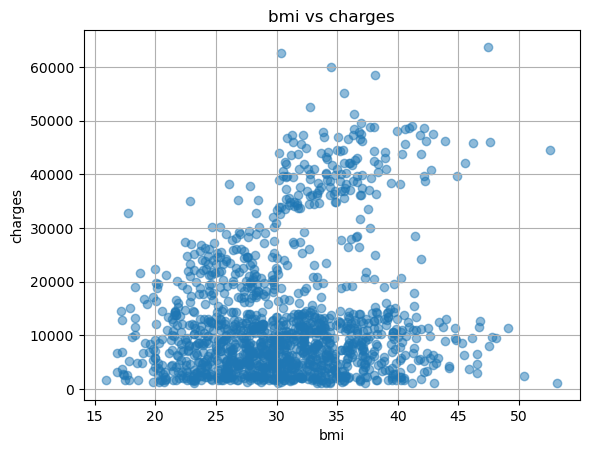

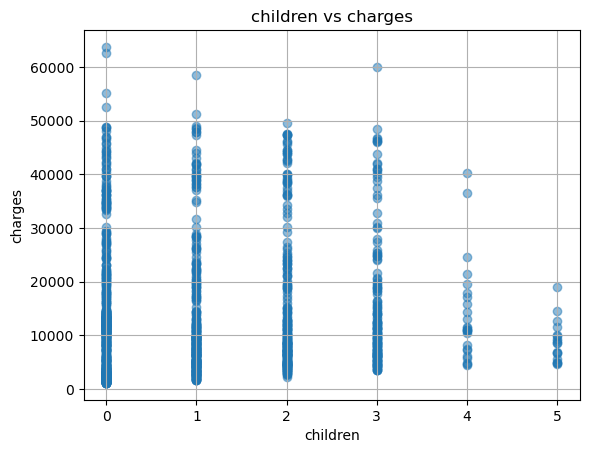

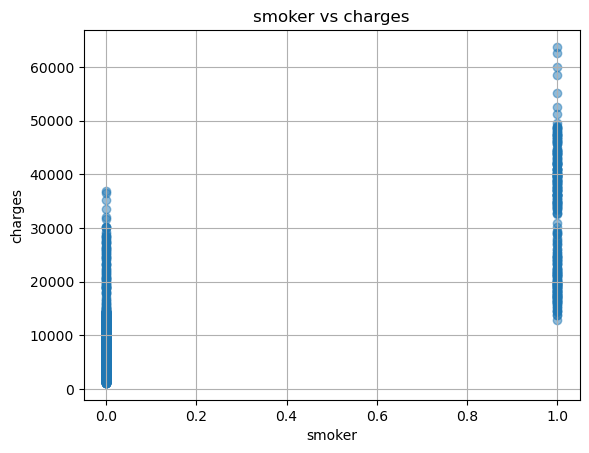

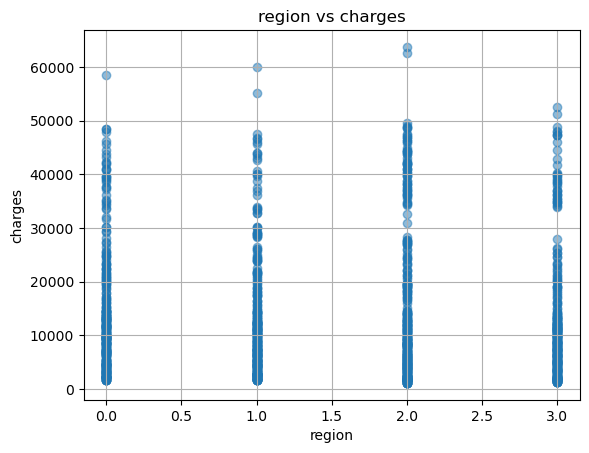

In [9]:
import matplotlib.pyplot as plt

features = [col for col in data.columns if col != 'charges']

for feature in features:
    plt.figure()
    plt.scatter(data[feature], data['charges'], alpha=0.5)
    plt.title(f'{feature} vs charges')
    plt.xlabel(feature)
    plt.ylabel('charges')
    plt.grid(True)
    plt.show()

3. IMPARTIRE IN TRAIN SI VALIDATION 

In [17]:
from sklearn.model_selection import train_test_split

train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

print(f"Train: {len(train_data)} randuri")
print(f"Validation: {len(val_data)} randuri")

Train: 1070 randuri
Validation: 268 randuri


4. GRADIENT DESCENT : 

In [22]:
import numpy as np
import matplotlib.pyplot as plt

X_train = train_data.drop('charges', axis=1)
y_train = train_data['charges']

X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy().reshape(-1, 1)

# Adăugăm coloana de 1 pentru bias
X_b = np.hstack([np.ones((X_train_np.shape[0], 1)), X_train_np])


theta = np.zeros((X_b.shape[1], 1))


def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = X @ theta
        errors = predictions - y
        gradients = (1 / m) * X.T @ errors
        theta = theta - learning_rate * gradients
        cost = (1 / (2 * m)) * np.sum(errors ** 2)
        cost_history.append(cost)
        print(f"Iterația {i+1}, Cost: {cost}")
    
    return theta, cost_history

Iterația 1, Cost: 161225866.59212065
Iterația 2, Cost: 61970744257.18516
Iterația 3, Cost: 39835485893407.29
Iterația 4, Cost: 2.5633418787853028e+16
Iterația 5, Cost: 1.6494670697836018e+19
Iterația 6, Cost: 1.06140411610444e+22
Iterația 7, Cost: 6.82995567674854e+24
Iterația 8, Cost: 4.394960773052043e+27
Iterația 9, Cost: 2.828082803293038e+30
Iterația 10, Cost: 1.8198233739245934e+33


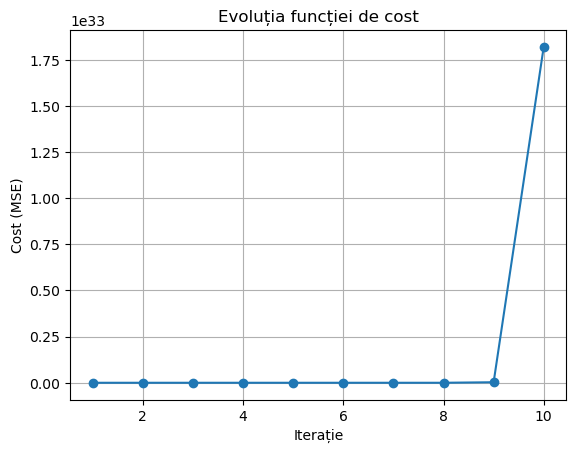

In [24]:
learning_rate = 0.01
iterations = 10


theta_final, cost_history = gradient_descent(X_b, y_train_np, theta, learning_rate, iterations)


plt.plot(range(1, iterations + 1), cost_history, marker='o')
plt.xlabel("Iterație")
plt.ylabel("Cost (MSE)")
plt.title("Evoluția funcției de cost")
plt.grid(True)
plt.show()


Iterația 1, Cost: 161225866.59212065
Iterația 2, Cost: 322706236.54434633
Iterația 3, Cost: 755320319.5029129
Iterația 4, Cost: 1914237945.3453057
Iterația 5, Cost: 5018757795.912027
Iterația 6, Cost: 13335108787.723356
Iterația 7, Cost: 35612788122.24733
Iterația 8, Cost: 95289742480.39633
Iterația 9, Cost: 255150989937.46017
Iterația 10, Cost: 683383553781.2648


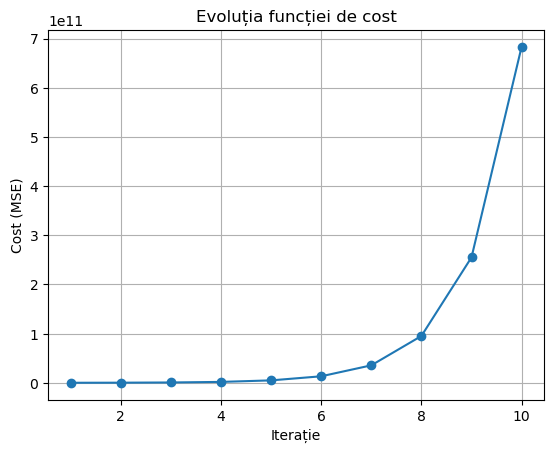

In [26]:
learning_rate = 0.001
iterations = 10


theta_final, cost_history = gradient_descent(X_b, y_train_np, theta, learning_rate, iterations)


plt.plot(range(1, iterations + 1), cost_history, marker='o')
plt.xlabel("Iterație")
plt.ylabel("Cost (MSE)")
plt.title("Evoluția funcției de cost")
plt.grid(True)
plt.show()

Iterația 1, Cost: 161225866.59212065
Iterația 2, Cost: 117179188.89627244
Iterația 3, Cost: 93296694.73931928
Iterația 4, Cost: 80346872.71382253
Iterația 5, Cost: 73324560.2114895
Iterația 6, Cost: 69516046.3162598
Iterația 7, Cost: 67450004.75934061
Iterația 8, Cost: 66328708.29183109
Iterația 9, Cost: 65719643.16114713
Iterația 10, Cost: 65388307.92557867


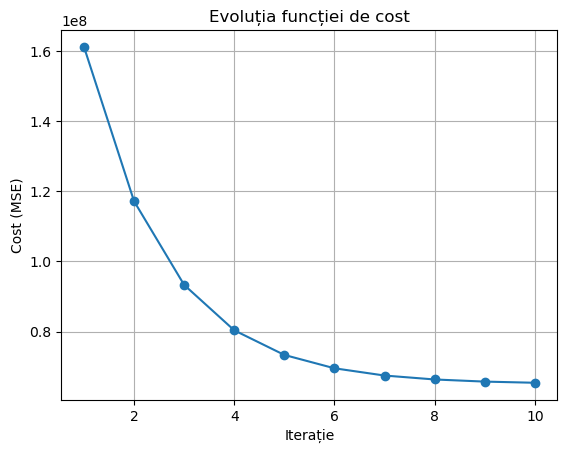

In [28]:
learning_rate = 0.0001
iterations = 10


theta_final, cost_history = gradient_descent(X_b, y_train_np, theta, learning_rate, iterations)


plt.plot(range(1, iterations + 1), cost_history, marker='o')
plt.xlabel("Iterație")
plt.ylabel("Cost (MSE)")
plt.title("Evoluția funcției de cost")
plt.grid(True)
plt.show()

5. R SQUARED 

In [30]:
from sklearn.metrics import r2_score


y_train_pred = X_b @ theta_final
r2_train = r2_score(y_train, y_train_pred)


X_val = val_data.drop('charges', axis=1)
y_val = val_data['charges']

X_val_np = X_val.to_numpy()
X_val_b = np.hstack([np.ones((X_val_np.shape[0], 1)), X_val_np])


y_val_pred = X_val_b @ theta_final
r2_val = r2_score(y_val, y_val_pred)


print(f"R² pe setul de train: {r2_train}")
print(f"R² pe setul de validation: {r2_val}")

R² pe setul de train: 0.09643284703060406
R² pe setul de validation: 0.13839469827649398


Am ales Learning Rate = 0.0001, pt ca restul valorilor divergeau. 
Pe train avem R^2 < 0.10 si pe validare avem R^2 < 0.20 => se descurca mai bine pe datele de valiadare, insa ambele valori sunt mici ceea ce
inseamna ca este un model prost.

6.1 GRADIENT DESCENT CU NORMALIZARE

In [36]:

X_train = train_data.drop('charges', axis=1)
y_train = train_data['charges']


means = X_train.mean()
stds = X_train.std()
X_train_norm = (X_train - means) / stds


X_train_np = X_train_norm.to_numpy()
y_train_np = y_train.to_numpy().reshape(-1, 1)


X_b = np.hstack([np.ones((X_train_np.shape[0], 1)), X_train_np])


theta = np.zeros((X_b.shape[1], 1))


def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []
    for i in range(iterations):
        predictions = X @ theta
        errors = predictions - y
        gradients = (1 / m) * X.T @ errors
        theta = theta - learning_rate * gradients
        cost = (1 / (2 * m)) * np.sum(errors ** 2)
        cost_history.append(cost)
        print(f"Iterația {i+1}, Cost: {cost}")
    return theta, cost_history

Iterația 1, Cost: 161225866.59212065
Iterația 2, Cost: 134232559.7225344
Iterația 3, Cost: 112363679.96940833
Iterația 4, Cost: 94643699.3575343
Iterația 5, Cost: 80283315.89804476
Iterația 6, Cost: 68643804.13898997
Iterația 7, Cost: 59208209.37774979
Iterația 8, Cost: 51558067.99348208
Iterația 9, Cost: 45354590.74989563
Iterația 10, Cost: 40323451.04601333


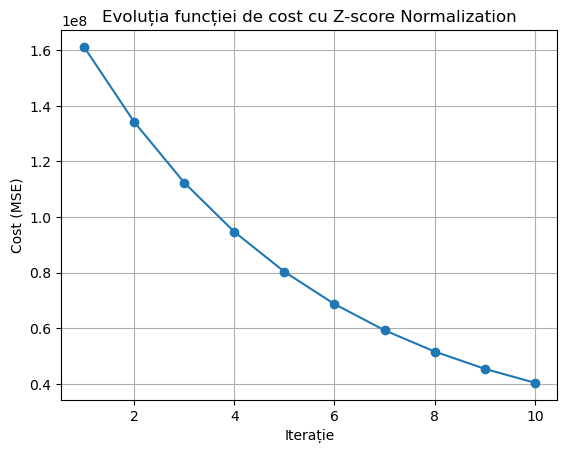

In [38]:
learning_rate = 0.1
iterations = 10
theta_final, cost_history = gradient_descent(X_b, y_train_np, theta, learning_rate, iterations)


plt.plot(range(1, iterations + 1), cost_history, marker='o')
plt.xlabel("Iterație")
plt.ylabel("Cost (MSE)")
plt.title("Evoluția funcției de cost cu Z-score Normalization")
plt.grid(True)
plt.show()


Iterația 1, Cost: 161225866.59212065
Iterația 2, Cost: 158398746.94214073
Iterația 3, Cost: 155627854.4204834
Iterația 4, Cost: 152912067.32349586
Iterația 5, Cost: 150250286.39378068
Iterația 6, Cost: 147641434.36963582
Iterația 7, Cost: 145084455.54356763
Iterația 8, Cost: 142578315.3296924
Iterația 9, Cost: 140121999.83984748
Iterația 10, Cost: 137714515.46823657


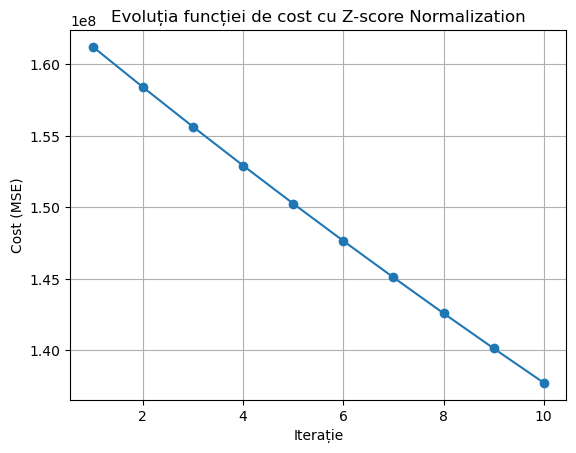

In [40]:
learning_rate = 0.01
iterations = 10
theta_final, cost_history = gradient_descent(X_b, y_train_np, theta, learning_rate, iterations)


plt.plot(range(1, iterations + 1), cost_history, marker='o')
plt.xlabel("Iterație")
plt.ylabel("Cost (MSE)")
plt.title("Evoluția funcției de cost cu Z-score Normalization")
plt.grid(True)
plt.show()


Iterația 1, Cost: 161225866.59212065
Iterația 2, Cost: 160941876.73749244
Iterația 3, Cost: 160658454.26455623
Iterația 4, Cost: 160375598.03623328
Iterația 5, Cost: 160093306.91773045
Iterația 6, Cost: 159811579.77653626
Iterația 7, Cost: 159530415.4824156
Iterația 8, Cost: 159249812.9074055
Iterația 9, Cost: 158969770.92581052
Iterația 10, Cost: 158690288.4141981


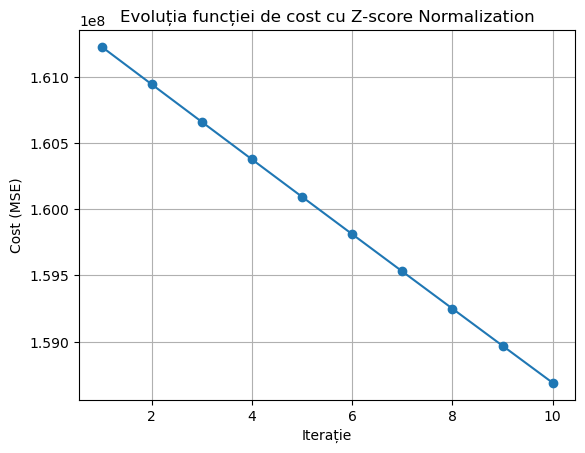

In [42]:

learning_rate = 0.001
iterations = 10
theta_final, cost_history = gradient_descent(X_b, y_train_np, theta, learning_rate, iterations)


plt.plot(range(1, iterations + 1), cost_history, marker='o')
plt.xlabel("Iterație")
plt.ylabel("Cost (MSE)")
plt.title("Evoluția funcției de cost cu Z-score Normalization")
plt.grid(True)
plt.show()


Learning rate-ul ales e de 0.1 pt ca el are cea mai rapida scadere spre deosebire de 0.01 si 0.001 care sunt valori mai mici.
Inainte pt valori mai mari, learning rate-ul mergea la inifinit, iar pt valori mai mici convergea. Cele 2 metode sunt invers in ceea ce priveste
alegerea learning rate-ului

6.2 R SQUARED CU NORMALIZARE

In [85]:
X_train = train_data.drop('charges', axis=1)
y_train = train_data['charges']
X_val = val_data.drop('charges', axis=1)
y_val = val_data['charges']


means = X_train.mean()
stds = X_train.std()


X_train_norm = (X_train - means) / stds
X_val_norm = (X_val - means) / stds 

X_train_np = X_train_norm.to_numpy()
X_val_np = X_val_norm.to_numpy()
y_train_np = y_train.to_numpy().reshape(-1, 1)
y_val_np = y_val.to_numpy().reshape(-1, 1)


X_train_b = np.hstack([np.ones((X_train_np.shape[0], 1)), X_train_np])
X_val_b = np.hstack([np.ones((X_val_np.shape[0], 1)), X_val_np])


theta = np.zeros((X_train_b.shape[1], 1))
learning_rate = 0.1
iterations = 10
m = len(y_train_np)
for _ in range(iterations):
    predictions = X_train_b @ theta
    errors = predictions - y_train_np
    gradients = (1 / m) * X_train_b.T @ errors
    theta = theta - learning_rate * gradients


y_train_pred = X_train_b @ theta
y_val_pred = X_val_b @ theta


r2_train = r2_score(y_train_np, y_train_pred)
r2_val = r2_score(y_val_np, y_val_pred)


print(f"R² (train): {r2_train}")
print(f"R² (validation): {r2_val}")

R² (train): 0.4977956620288644
R² (validation): 0.5500286827815263


Observam ca acum modelul s-a antrenat mult mai bine decat in momentul cand nu am folosit antrenarea. Valorile lui train sunt apropiate de cele
de validare, astfel nu ne putem pune problema de overfitting

In [ ]:
7. IMPORTANTA FEATURES :

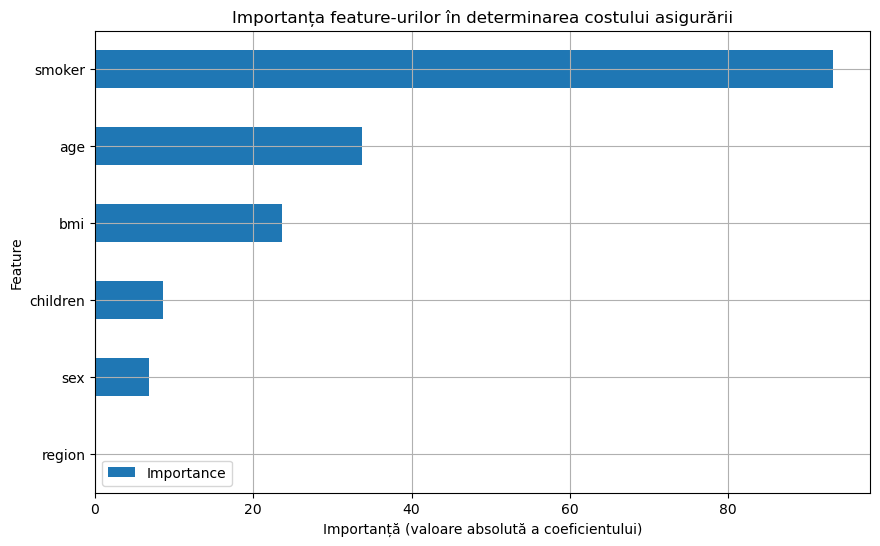

In [49]:
import copy

coefficients = copy.deepcopy(theta_final[1:])  # eliminăm bias-ul (primul weight)


feature_importance = pd.DataFrame({
    'Feature': X_train.columns.values,
    'Importance': np.abs(coefficients).flatten()
})


feature_importance = feature_importance.sort_values('Importance', ascending=True)


feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.title('Importanța feature-urilor în determinarea costului asigurării')
plt.xlabel('Importanță (valoare absolută a coeficientului)')
plt.grid(True)
plt.show()

Se pare ca smoker are cea mai mare importanta

8.1 ANTRENARE GRADIENT DESCENT FOLOSIND SI COLOANE POLINOMAILE : 

In [75]:
import numpy as np
import matplotlib.pyplot as plt


X_train = train_data.drop('charges', axis=1)
y_train = train_data['charges']


X_poly = X_train.copy()
for col in X_train.columns:
    X_poly[f'{col}^2'] = X_train[col] ** 2


means = X_poly.mean()
stds = X_poly.std()
X_poly_norm = (X_poly - means) / stds


X_np = X_poly_norm.to_numpy()
X_b = np.hstack([np.ones((X_np.shape[0], 1)), X_np])
y_train_np = y_train.to_numpy().reshape(-1, 1)


theta = np.zeros((X_b.shape[1], 1))


def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = X @ theta
        errors = predictions - y
        gradients = (1 / m) * X.T @ errors
        theta = theta - learning_rate * gradients
        cost = (1 / (2 * m)) * np.sum(errors ** 2)
        cost_history.append(cost)
        print(f"Iterația {i+1}, Cost: {cost}")
    
    return theta, cost_history

Iterația 1, Cost: 161225866.59212065
Iterația 2, Cost: 125261530.62525302
Iterația 3, Cost: 99320463.50278184
Iterația 4, Cost: 80343854.24589464
Iterația 5, Cost: 66274070.447727084
Iterația 6, Cost: 55710810.19103776
Iterația 7, Cost: 47689064.326692685
Iterația 8, Cost: 41534878.73317389
Iterația 9, Cost: 36771013.35999206
Iterația 10, Cost: 33054754.084838483


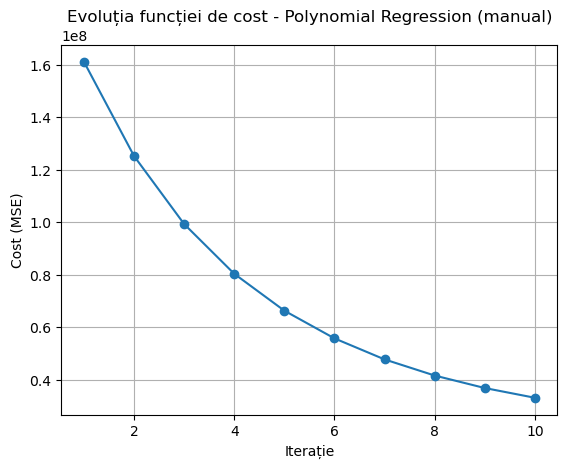

In [73]:

learning_rate = 0.1
iterations = 10
theta_final, cost_history = gradient_descent(X_b, y_train_np, theta, learning_rate, iterations)


plt.plot(range(1, iterations + 1), cost_history, marker='o')
plt.xlabel("Iterație")
plt.ylabel("Cost (MSE)")
plt.title("Evoluția funcției de cost - Polynomial Regression (manual)")
plt.grid(True)
plt.show()

Iterația 1, Cost: 161225866.59212065
Iterația 2, Cost: 157360133.50035247
Iterația 3, Cost: 153612059.1037924
Iterația 4, Cost: 149977676.12692448
Iterația 5, Cost: 146453161.57765806
Iterația 6, Cost: 143034831.23356736
Iterația 7, Cost: 139719134.34539977
Iterația 8, Cost: 136502648.5491272
Iterația 9, Cost: 133382074.97816767
Iterația 10, Cost: 130354233.56774732


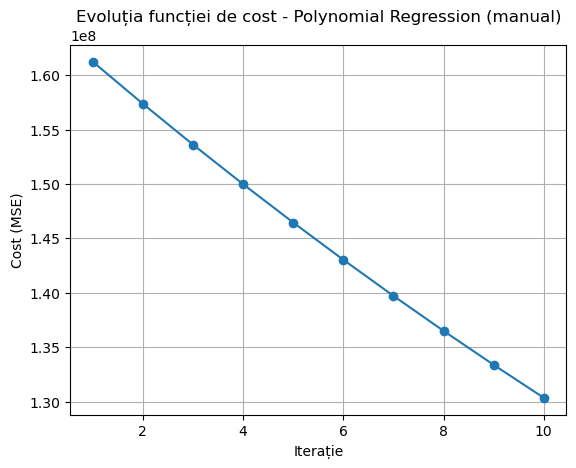

In [63]:
learning_rate = 0.01
iterations = 10
theta_final, cost_history = gradient_descent(X_b, y_train_np, theta, learning_rate, iterations)


plt.plot(range(1, iterations + 1), cost_history, marker='o')
plt.xlabel("Iterație")
plt.ylabel("Cost (MSE)")
plt.title("Evoluția funcției de cost - Polynomial Regression (manual)")
plt.grid(True)
plt.show()

Iterația 1, Cost: 161225866.59212065
Iterația 2, Cost: 160836600.287993
Iterația 3, Cost: 160448528.83210376
Iterația 4, Cost: 160061648.15700373
Iterația 5, Cost: 159675954.21018538
Iterația 6, Cost: 159291442.95402497
Iterația 7, Cost: 158908110.36572516
Iterația 8, Cost: 158525952.43725774
Iterația 9, Cost: 158144965.1753068
Iterația 10, Cost: 157765144.6012118


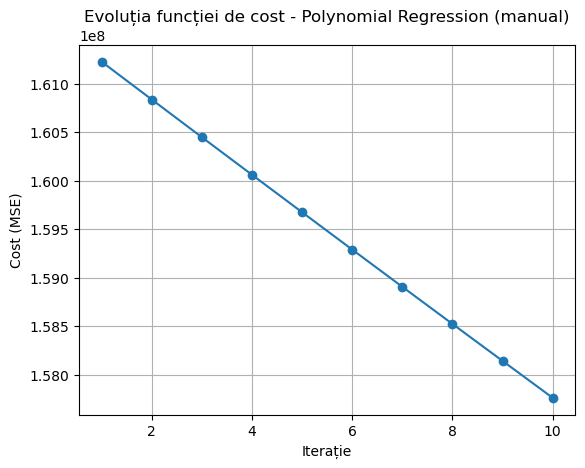

In [61]:
learning_rate = 0.001
iterations = 10
theta_final, cost_history = gradient_descent(X_b, y_train_np, theta, learning_rate, iterations)


plt.plot(range(1, iterations + 1), cost_history, marker='o')
plt.xlabel("Iterație")
plt.ylabel("Cost (MSE)")
plt.title("Evoluția funcției de cost - Polynomial Regression (manual)")
plt.grid(True)
plt.show()

! Observam ca cel mai bun learning rate = 0.1 pt ca scade cel mai rapid eroarea

In [ ]:
8.2 R SQUARED PT MODELUL CU COLOANE NOI POLINOMIALE : 

Iterația 1, Cost: 161225866.59212065
Iterația 2, Cost: 125261530.62525302
Iterația 3, Cost: 99320463.50278184
Iterația 4, Cost: 80343854.24589464
Iterația 5, Cost: 66274070.447727084
Iterația 6, Cost: 55710810.19103776
Iterația 7, Cost: 47689064.326692685
Iterația 8, Cost: 41534878.73317389
Iterația 9, Cost: 36771013.35999206
Iterația 10, Cost: 33054754.084838483


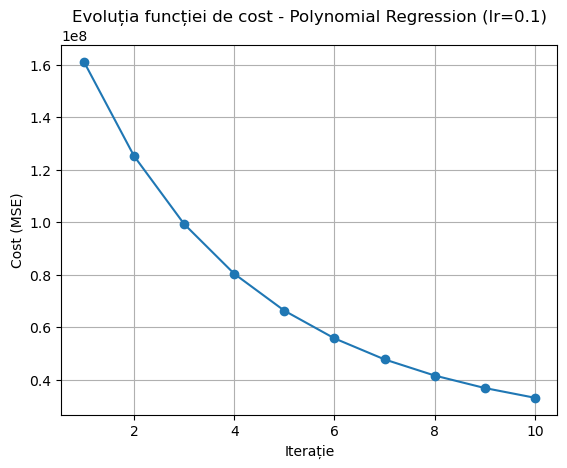

R² (train): 0.582404218277558
R² (validation): 0.6437284485619172


In [89]:
X_train = train_data.drop('charges', axis=1)
y_train = train_data['charges']
X_val = val_data.drop('charges', axis=1)
y_val = val_data['charges']


X_poly_train = X_train.copy()
X_poly_val = X_val.copy()
for col in X_train.columns:
    X_poly_train[f'{col}^2'] = X_train[col] ** 2
    X_poly_val[f'{col}^2'] = X_val[col] ** 2


means = X_poly_train.mean()
stds = X_poly_train.std()
X_poly_train_norm = (X_poly_train - means) / stds
X_poly_val_norm = (X_poly_val - means) / stds  


X_train_np = X_poly_train_norm.to_numpy()
X_val_np = X_poly_val_norm.to_numpy()
X_train_b = np.hstack([np.ones((X_train_np.shape[0], 1)), X_train_np])
X_val_b = np.hstack([np.ones((X_val_np.shape[0], 1)), X_val_np])
y_train_np = y_train.to_numpy().reshape(-1, 1)
y_val_np = y_val.to_numpy().reshape(-1, 1)


theta = np.zeros((X_train_b.shape[1], 1))
learning_rate = 0.1
iterations = 10
theta_final, cost_history = gradient_descent(X_train_b, y_train_np, theta, learning_rate, iterations)


plt.plot(range(1, iterations + 1), cost_history, marker='o')
plt.xlabel("Iterație")
plt.ylabel("Cost (MSE)")
plt.title("Evoluția funcției de cost - Polynomial Regression (lr=0.1)")
plt.grid(True)
plt.show()


y_train_pred = X_train_b @ theta_final
y_val_pred = X_val_b @ theta_final



r2_train = r2_score(y_train_np, y_train_pred)
r2_val = r2_score(y_val_np, y_val_pred)

print(f"R² (train): {r2_train}")
print(f"R² (validation): {r2_val}")


! Se pare ca am obitnut o antrenare si mai buna decat cea in care nu am folsoit coloane polinomiale 

9. IMPORTANCE FEATURES PT MODEL + COLOANE POLNOMIALE 

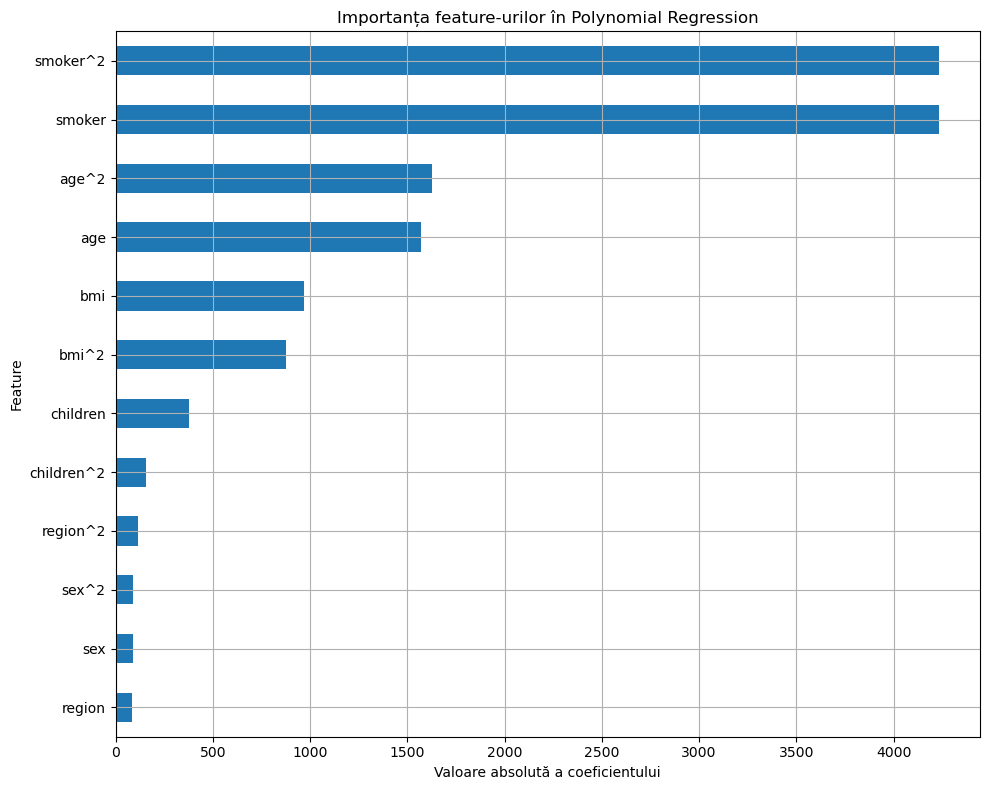

In [67]:
coefficients = copy.deepcopy(theta_final[1:])


feature_names = X_poly_train.columns


feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(coefficients).flatten()
})


feature_importance = feature_importance.sort_values('Importance', ascending=True)

feature_importance.plot(
    x='Feature', y='Importance', kind='barh', figsize=(10, 8), legend=False
)
plt.title("Importanța feature-urilor în Polynomial Regression")
plt.xlabel("Valoare absolută a coeficientului")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
Smoker si Smoker^2 au cea mai mare importanta